# Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import nltk
import numpy as np
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import _stop_words
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eeejo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eeejo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load Data

In [2]:
book_data = pd.read_csv(r"C:\Users\eeejo\Downloads\books_data.csv")
book_rating = pd.read_csv(r"C:\Users\eeejo\Downloads\Books_rating.csv")

In [6]:
book_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [7]:
book_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


# Data Cleaning
## 1. Irrelevant Features


We will remove irrelevant features within the dataset that are irrelevant or do not contribute to the potential analytical goals of our project.
Features to be removed includes:

* **id: The id of Book**

* **image: The url for book cover**

* **previewLink: Link to access this book on Google Books**

* **infoLink: Link to get more information about the book on Google Books**


In [8]:
book_data_irrelevant_features = {'image','previewLink','infoLink'}
book_data = book_data.drop(book_data_irrelevant_features, axis=1)
book_data.head()

,Title,description,authors,publisher,publishedDate,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],NaN,1996,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],NaN,2000,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,2005-02,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,2003-03-01,NaN,NaN


In [9]:
book_rating = book_rating.drop('Id',axis=1)
book_rating.head()

,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## 2. Data Integrity

In [10]:
# check data integrity of book_data
total = book_data.isnull().sum().sort_values(ascending = False)
percentage = (book_data.isnull().sum()/book_data.shape[0]*100).sort_values(ascending = False)
missing_value_book_data = pd.concat([total, percentage], axis = 1, keys = ['Counts of Missing Values', 'Percentage'])
print(missing_value_book_data)

               Counts of Missing Values  Percentage
ratingsCount                     162652   76.576712
publisher                         75886   35.727199
description                       68442   32.222557
categories                        41199   19.396527
authors                           31413   14.789270
publishedDate                     25305   11.913617
Title                                 1    0.000471


In [11]:
# check data integrity of book_rating
total = book_rating.isnull().sum().sort_values(ascending = False)
percentage = (book_rating.isnull().sum()/book_rating.shape[0]*100).sort_values(ascending = False)
missing_value_book_rating = pd.concat([total, percentage], axis = 1, keys = ['Counts of Missing Values', 'Percentage'])
print(missing_value_book_rating)

                    Counts of Missing Values  Percentage
Price                                2518829   83.960967
profileName                           561905   18.730167
User_id                               561787   18.726233
review/summary                           407    0.013567
Title                                    208    0.006933
review/text                                8    0.000267
review/helpfulness                         0    0.000000
review/score                               0    0.000000
review/time                                0    0.000000


### 2.1 Columns with Significant Missing Values:

* **ratingsCount: The count of ratings for book**

This feature exhibits a significant proportion of missing values, 
amounting to 77%. It represents the number of ratings for each book. 
Given its high missing rate, we will remove this feature entirely from our 
dataset.

* **Price: The price of Book**

This feature is characterized by 84% missing values, which, despite its 
potential usefulness for our analysis, renders it unsuitable for reliable 
imputation. Considering the substantial gap in data, we have opted to 
entirely remove this feature from our dataset. 

In [12]:
book_data = book_data.drop('ratingsCount',axis = 1)

In [13]:
book_rating = book_rating.drop('Price', axis=1)

### 2.2 Columns with Moderate Missing Values:

* **profileName: Name of the user who rates the book - Missing %: 19%**
* **authors: Name of book authors - Missing %: 15%**
* **publisher: Name of the publisher - Missing %: 36%**
* **categories: Genres of books - Missing %: 19%**

For the above features in question, after considering their data type and 
contextual relevance, we have chosen to impute the missing entries with a new 
category labeled “Unknown” for these specific features. 

* **description: Description of book - Missing %: 32%**

Recognizing its importance for text analytics due to the rich text information it 
provides, we have opted to impute these missing values with a placeholder text 
labeled “Unknown” for this particular feature. 

* **publishedDate: The date of publish - Missing %: 12%**

We need to convert the column pulishedDate in following steps, so we will process missing values in next part.




In [14]:
columns_to_fill = ['authors', 'publisher', 'categories','description']
book_data[columns_to_fill] = book_data[columns_to_fill].fillna('Unknown')


In [15]:
book_data[columns_to_fill].isnull().sum()

authors        0
publisher      0
categories     0
description    0
dtype: int64

In [16]:
book_rating['profileName'] = book_rating['profileName'].fillna('Unknown')

In [17]:
book_rating['profileName'].isnull().sum()

0

### 2.3 Columns with Minimal Missing Values:

 In cases where features exhibit missing values that constitute less than 0.0001% of the dataset’s total size, we have chosen to remove the rows containing missing values for any such features entirely. These features include:

* **Title: Book Title**
* **review/summary: Summary of a text review**
* **review/text: Full text of a review**

In [18]:
columns_to_drop = ['Title', 'review/summary', 'review/text']
book_rating = book_rating.dropna(subset = columns_to_drop)

In [19]:
book_rating[columns_to_drop].isnull().sum()

Title             0
review/summary    0
review/text       0
dtype: int64

## 3. Data Consistency

* **publishedDate: The date of publish**

Notable inconsistencies are observed in the format of the publication dates within the "publishedDate" column, complicating its utilization. 
To address this, we intend to extract the year value from the "publishedDate" column and subsequently discard the original column. This streamlined approach will facilitate a more uniform and efficient analysis of publication dates. 

In [20]:
def extract_year(publish_date):
  try:
    date = pd.to_datetime(publish_date)
    return date.year
  except:
    return None

In [21]:
book_data['publishedYear'] = book_data['publishedDate'].apply(extract_year)
book_data = book_data.drop(['publishedDate'], axis = 1)
book_data.head()

,Title,description,authors,publisher,categories,publishedYear
0,Its Only Art If Its Well Hung!,Unknown,['Julie Strain'],Unknown,['Comics & Graphic Novels'],1996.0
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,['Biography & Autobiography'],2005.0
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],Unknown,['Religion'],2000.0
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,['Fiction'],2005.0
4,"Nation Dance: Religion, Identity and Cultural ...",Unknown,['Edward Long'],Unknown,Unknown,2003.0


Then we will replace missing values of the column 'year' with label 'Unknown'.

In [22]:
book_data['publishedYear'] = book_data['publishedYear'].fillna('Unkown')
book_data['publishedYear'].isnull().sum()

0

## 4. Data Readability

### 4.1 Time Conversion
* **review/time: time of given the review**

The column 'review/time' utilized the Unix timestamp to represent the time of given reviews. For the consideration of following analysis and readability, we will convert values in this column to a standard date format.




In [23]:
book_rating['review/time'] = pd.to_datetime(book_rating['review/time'], unit = 's')
book_rating.head()

,Title,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,1999-10-23,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,10/11,5.0,2004-03-09,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,2005-02-10,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


### 4.2 Removing symbols

* **authors: Name of book authors**
* **categories: genres of books**

We will remove unnecessary brackets and punctuations from these two columns.

In [24]:
non_punct_author = []
non_punct_categories = []

for author, category in zip(book_data['authors'], book_data['categories']):
  letters_authors = re.sub(r'[\[\]\'"]', '', author)
  non_punct_author.append(''.join(letters_authors))

  letters_categories = re.sub(r'[\[\]\'"]', '', category)
  non_punct_categories.append(''.join(letters_categories))

book_data['authors'] = pd.Series(non_punct_author)
book_data['categories'] = pd.Series(non_punct_categories)

book_data.head()

,Title,description,authors,publisher,categories,publishedYear
0,Its Only Art If Its Well Hung!,Unknown,Julie Strain,Unknown,Comics & Graphic Novels,1996.0
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,Biography & Autobiography,2005.0
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,David R. Ray,Unknown,Religion,2000.0
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,Veronica Haddon,iUniverse,Fiction,2005.0
4,"Nation Dance: Religion, Identity and Cultural ...",Unknown,Edward Long,Unknown,Unknown,2003.0


### 4.3 Reclassification of Categories

* **categories: genres of books**

This column presents 10,883 unique categories across 212,404 books, a level of granularity that may dilute meaningful analysis due to the excessive specificity of some categories.

Upon closer examination, we identified instances where categories could be generalized for greater relevance and coherence, such as reclassifying "New Zealand fiction" simply as "Fiction." To address this, we are considering the application of text clustering or a rule-based approach for a more rationalized reclassification of these categories, aiming to streamline the dataset for more insightful analysis. 

In [25]:
cate = book_data[['Title','categories']]
cate.head()

,Title,categories
0,Its Only Art If Its Well Hung!,Comics & Graphic Novels
1,Dr. Seuss: American Icon,Biography & Autobiography
2,Wonderful Worship in Smaller Churches,Religion
3,Whispers of the Wicked Saints,Fiction
4,"Nation Dance: Religion, Identity and Cultural ...",Unknown


In [26]:
cate_counts = cate['categories'].value_counts()
percentage = (cate_counts/len(cate)*100).round(2)
cate_top = pd.DataFrame({'cate_counts':cate_counts, 'Percentage': percentage})
cate_top.head(50)

,cate_counts,Percentage
categories,,
Unknown,41199,19.40
Fiction,23419,11.03
Religion,9459,4.45
History,9330,4.39
Juvenile Fiction,6643,3.13
Biography & Autobiography,6324,2.98
Business & Economics,5625,2.65
Computers,4312,2.03
Social Science,3834,1.81


Based on outputs above, we observe that the top 50 most frequently appeared categories represent 61.28% (excluding the 'Unknown' feature) of the total number of books in our dataset, while the remaining categories account for less than 40% of total number. Therefore, we will manually merge and reclassify these top 50 categories, then categorize the remaining niche categories based on keywords.

#### 4.3.1 Merge and Reclassify top 50 categories

Based on semantics, we will make following adjustments on the top 50 categories:

* categorize 'Young Adult Fiction' under 'Juvenile Fiction', 
* categorize 'Bible' under 'Religion'; 
* categorize 'Nature' under 'Science'; 
* categorize 'Music', 'Performing Arts', 'Photography', 'Antiques & Collectibles' under 'Art'; 
* categorize 'Psychology', 'Political Science' under 'Social Science'; 

* merge 'Cooking', 'Crafts & Hobbies', 'Pets', 'Games', 'Gardening' into the new category 'Lifestyle & Leisure';
* merge 'Language Arts & Disciplines', 'Foreign Language Study' into the new category 'Language';
* merge 'Sports & Recreation', 'Health & Fitness' into the new category 'Sports & Fitness';
* merge 'Literary Criticism', 'Poetry', 'Drama', 'Literary Collections' into the new category 'Non-Fiction Literature';
* merge 'Family & Relationships', 'Body, Mind & Spirit' and 'Self-Help' into the new category 'Personal Development';
* merge 'Science' and 'Technology & Engineering' into the new category 'Science & Technology'.

In [27]:
cate.loc[cate['categories'] == 'Young Adult Fiction', 'categories'] = 'Juvenile Fiction'
cate.loc[cate['categories'] == 'Bible', 'categories'] = 'Religion'
cate.loc[cate['categories'] == 'Nature', 'categories'] = 'Science'
cate.loc[cate['categories'].isin(['Music', 'Performing Arts', 'Photography', 'Antiques & Collectibles']), 'categories'] = 'Art'
cate.loc[cate['categories'].isin(['Psychology', 'Political Science']), 'categories'] = 'Social Science'
cate.loc[cate['categories'].isin(['Cooking', 'Crafts & Hobbies', 'Pets', 'Games', 'Gardening']), 'categories'] = 'Lifestyle & Leisure'
cate.loc[cate['categories'].isin(['Language Arts & Disciplines', 'Foreign Language Study']), 'categories'] = 'Language'
cate.loc[cate['categories'].isin(['Sports & Recreation', 'Health & Fitness']), 'categories'] = 'Sports & Fitness'
cate.loc[cate['categories'].isin(['Literary Criticism', 'Poetry', 'Drama', 'Literary Collections']), 'categories'] = 'Non-Fiction Literature'
cate.loc[cate['categories'].isin(['Family & Relationships', 'Body, Mind & Spirit', 'Self-Help']), 'categories'] = 'Personal Development'
cate.loc[cate['categories'].isin(['Science', 'Technology & Engineering']), 'categories'] = 'Science & Technology'
cate['categories'] = cate['categories'].replace('Unknown', 'Others')


C:\Users\eeejo\AppData\Local\Temp\ipykernel_29808\1695466420.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate['categories'] = cate['categories'].replace('Unknown', 'Others')


Then, we reclassify niche categories beyond top 50 by extracting keywords.

In [28]:
cate_counts = cate['categories'].value_counts()
percentage = (cate_counts/len(cate)*100).round(2)
cate_top = pd.DataFrame({'cate_counts':cate_counts, 'Percentage': percentage})
cate_top.head(50)

,cate_counts,Percentage
categories,,
Others,41199,19.40
Fiction,23419,11.03
Religion,10126,4.77
History,9330,4.39
Social Science,7702,3.63
Juvenile Fiction,7238,3.41
Art,6918,3.26
Biography & Autobiography,6324,2.98
Personal Development,5746,2.71


#### 4.3.2 Keyword Mapping
For those niche categories beyond the top 50 categories, we can deploy keyword mapping techniques for recategorization. 

We will start with more specific keywords to ensure accuracy. For example, there's a category named 'Bible stories' in our dataset, we need to reclassify it under 'Religion' based on the keyword 'Bible', instead of classifying it based on the keyword 'stories'.  So we will start from more specific keywords, such as Bible, Christian, Judaism and Buddhism.


In [29]:
cate.loc[cate['categories'].str.contains('bible|christian|judaism|muslim|religio|monastic|buddha|buddhism|buddhist|islam', case = False), 'categories'] = 'Religion'

Then we can use keywords related to prefessions (i.e. basketball player) to merge some niche categories inth the category 'Biography & Autobiography'.

In [30]:
cate.loc[cate['categories'].str.contains('singer|actor|actress|musician|player|celebrit|scientist', case = False), 'categories'] = 'Biography & Autobiography'

Niche categories contain specific keywords such as decorations, ornaments, and furnitures can be classified to the category 'Lifestyle & Leisure'. Categories contain keywords associated with sports can be categorize into the category 'Sports & Fitness'.

In [31]:
cate.loc[cate['categories'].str.contains('decorat|ornament|furniture|pets|garden|cook|baking|game|hobbies', case = False), 'categories'] = 'Lifestyle & Leisure'
cate.loc[cate['categories'].str.contains('fitness|sport|basketball|tennis|football|ballet|hockey|yoga|running|golf', case = False), 'categories'] = 'Sports & Fitness'

Next, we will perform mapping techniques for categories 'Language', 'Art', 'Mathematics', 'Business & Economics', 'History', 'Social Science', 'Computer' based on their respective keywords.

In [32]:
# Language
cate.loc[cate['categories'].str.contains('language|linguist|semantic', case = False), 'categories'] = 'Language'
# Art
cate.loc[cate['categories'].str.contains('painting|drawing|music|antique|collectible|stage|photograph|calligraphy', case = False), 'categories'] = 'Art'
# Mathematics
cate.loc[cate['categories'].str.contains('math|algebra|geometry|calculus', case = False), 'categories'] = 'Mathematics'
# Business & Economics
cate.loc[cate['categories'].str.contains('business|economic', case = False), 'categories'] = 'Business & Economics'
# History
cate.loc[cate['categories'].str.contains('historic|history', case = False), 'categories'] = 'History'
# Social Science
cate.loc[cate['categories'].str.contains('politic|psych', case = False), 'categories'] = 'Social Science'
# Computers
cate.loc[cate['categories'].str.contains('computer', case = False), 'categories'] = 'Computers'


As we have mapped niche keywords already, significantly lowering the possibility of misclassification, we will now proceed to map general keywords, such as fiction, science, and art.

Special consideration should be given to the following points:

* The string 'art' appears not only as an independent word but also within words, without any actual semantic meaning, we will use the expression r'\bart\b' to aviod mismatch.

* We will retain categories Fiction and Juvenile Fifction for subsequent analysis, therefore we will temporarily change the name of 'Juvenile Fiction' to 'Juvenile Fction' to prevent mapping errors.

* We will also temproralily change the name of category 'Social Science' and 'History' to prevent mapping errors.

In [33]:
# Art
cate.loc[cate['categories'].str.contains(r'\bart\b', case=False, na=False), 'categories'] = 'Art'

# Rename History
cate['categories'] = cate['categories'].replace('History', 'Histry')

# Juvenile Fiction
cate.loc[(cate['categories'].str.contains('juvenile', case=False)| \
          cate['categories'].str.contains('child', case=False)| \
          cate['categories'].str.contains('young', case=False) ) & \
         (cate['categories'].str.contains('novel', case=False) | \
          cate['categories'].str.contains(r'\bfiction\b', case=False) | \
          cate['categories'].str.contains(r'\bstor\b', case=False)), 'categories'] = 'Juvenile Fiction'
cate['categories'] = cate['categories'].replace('Juvenile Fiction', 'Juvenile Fction')

# Juvenile Non-Fiction
cate.loc[(cate['categories'].str.contains('juvenile', case=False)| \
          cate['categories'].str.contains('child', case=False)| \
          cate['categories'].str.contains('young', case=False) ) & \
         (cate['categories'].str.contains('nonfiction', case=False) | \
          cate['categories'].str.contains('non-fiction', case=False) | \
          cate['categories'].str.contains('poetry', case=False) | \
          cate['categories'].str.contains('litera', case=False) ), 'categories'] = 'Juvenile Nonfiction'
cate['categories'] = cate['categories'].replace('Juvenile Nonfiction', 'Juvenile Nonfction')

# Non-Fiction Literature
cate.loc[cate['categories'].str.contains('criticism|poetry|drama|litera', case = False), 'categories'] = 'Non-Fiction Literature'
cate['categories'] = cate['categories'].replace('Non-Fiction Literature', 'Non-Fction Literature')

# Fiction
cate.loc[cate['categories'].str.contains('fiction|stories|story|novel', case=False), 'categories'] = 'Fiction'

# Science
cate['categories'] = cate['categories'].replace('Social Science', 'Social Sci')
cate.loc[cate['categories'].str.contains('science', case = False), 'categories'] = 'Science & Technology'

# Convert name of categories to its original value
cate['categories'] = cate['categories'].replace('Juvenile Fction', 'Juvenile Fiction')
cate['categories'] = cate['categories'].replace('Juvenile Nonfction', 'Juvenile Nonfiction')
cate['categories'] = cate['categories'].replace('Non-Fction Literature', 'Non-Fiction Literature')
cate['categories'] = cate['categories'].replace('Social Sci', 'Social Science')
cate['categories'] = cate['categories'].replace('Histry', 'History')

C:\Users\eeejo\AppData\Local\Temp\ipykernel_29808\3516705640.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate['categories'] = cate['categories'].replace('History', 'Histry')
C:\Users\eeejo\AppData\Local\Temp\ipykernel_29808\3516705640.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate['categories'] = cate['categories'].replace('Juvenile Fiction', 'Juvenile Fction')
C:\Users\eeejo\AppData\Local\Temp\ipykernel_29808\3516705640.py:24: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [34]:
cate_counts = cate['categories'].value_counts()
percentage = (cate_counts/len(cate)*100).round(2)
cate_top = pd.DataFrame({'cate_counts':cate_counts, 'Percentage': percentage})
cate_top.head(21)

,cate_counts,Percentage
categories,,
Others,41199,19.40
Fiction,26825,12.63
Religion,11515,5.42
History,9594,4.52
Social Science,8068,3.80
Art,7617,3.59
Juvenile Fiction,7282,3.43
Lifestyle & Leisure,6814,3.21
Biography & Autobiography,6648,3.13


Based on outputs above, we observe that the top 20 most frequently appeared categories (excluding the column 'Other') represent 63.50% of the total number of books. 

#### 4.3.3 Word Cloud
After reclassification, the distribution of book categories become more concentrtaed. Now we will generate a word cloud for categories outside the top 20 categories to check any missing keywords.

In [35]:
top20_cate = cate['categories'].value_counts().head(21).index
other_cate = cate[~cate['categories'].isin(top20_cate)]

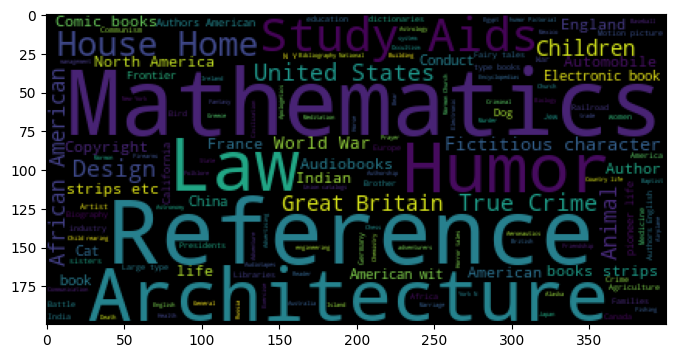

In [36]:
text = ' '
for x in other_cate['categories']:
    text+=' '+x

plt.figure(figsize=(8,10))
wc = WordCloud(max_words=1000,random_state=1).generate(text)
plt.imshow(wc)
plt.show()

In [37]:
cate.loc[cate['categories'].str.contains('home|house', case = False), 'categories'] = 'Lifestyle & Leisure'
cate.loc[cate['categories'].str.contains('design', case = False), 'categories'] = 'Art'
cate.loc[cate['categories'].str.contains('automobile', case = False), 'categories'] = 'Science & Technology '

## Data Export

In [38]:
new_cate = pd.merge(book_data, cate, how = 'left', on= 'Title')
new_cate.head(30)

,Title,description,authors,publisher,categories_x,publishedYear,categories_y
0,Its Only Art If Its Well Hung!,Unknown,Julie Strain,Unknown,Comics & Graphic Novels,1996.0,Fiction
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,Biography & Autobiography,2005.0,Biography & Autobiography
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,David R. Ray,Unknown,Religion,2000.0,Religion
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,Veronica Haddon,iUniverse,Fiction,2005.0,Fiction
4,"Nation Dance: Religion, Identity and Cultural ...",Unknown,Edward Long,Unknown,Unknown,2003.0,Others
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,Everett Ferguson,Wm. B. Eerdmans Publishing,Religion,1996.0,Religion
6,The Overbury affair (Avon),Unknown,Miriam Allen De Ford,Unknown,Unknown,1960.0,Others
7,A Walk in the Woods: a Play in Two Acts,Unknown,Lee Blessing,Unknown,Unknown,1988.0,Others
8,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,Mary Fabyan Windeatt,Tan Books & Pub,Biography & Autobiography,2009.0,Biography & Autobiography
9,Rising Sons and Daughters: Life Among Japan's ...,Wardell recalls his experience as a foreign st...,Steven Wardell,Plympton PressIntl,Social Science,1995.0,Social Science


In [39]:
new_cate = new_cate.drop(['categories_x'], axis = 1)
new_cate = new_cate.rename(columns = {'categories_y':'categories'})
new_cate.head()

,Title,description,authors,publisher,publishedYear,categories
0,Its Only Art If Its Well Hung!,Unknown,Julie Strain,Unknown,1996.0,Fiction
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,David R. Ray,Unknown,2000.0,Religion
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,Veronica Haddon,iUniverse,2005.0,Fiction
4,"Nation Dance: Religion, Identity and Cultural ...",Unknown,Edward Long,Unknown,2003.0,Others


In [40]:
review = pd.merge(book_rating, new_cate, how = 'left', on = 'Title')
review.head(2)

,Title,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,publisher,publishedYear,categories
0,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,1999-10-23,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Unknown,Julie Strain,Unknown,1996.0,Fiction
1,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography


In [41]:
review.to_csv(r"C:\Users\eeejo\Downloads\review_data.csv", index=False)